# One time correlation for Xiaoqian data
The analysis module "skxray/core/correlation" https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/correlation.py

In [1]:
import skxray.core.roi as roi
import skxray.core.correlation as corr
import skxray.core.utils as core

import numpy as np
import os, sys

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

# Easily switch between interactive and static matplotlib plots¶

In [2]:
interactive_mode = False

if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

backend = mpl.get_backend()

# Data Directory

In [9]:
data_dir = "/Volumes/Data/BeamLines/CSX_Data/X_data/"

X_data = np.load(data_dir+"Sample_data_Xiao.npy")
X_data.shape

(996, 30, 30)

# Created the Roi mask
Use the skxray.core.roi module rectangle mask

In [42]:
roi_data = np.array(([5, 5, 20,20],), dtype=np.int64)
label_array = roi.rectangles(roi_data, shape=X_data[0].shape)

# One-time Correlation

In [43]:
num_levels = 1
num_bufs = 500

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, label_array,
                                             X_data)

In [44]:
g2.shape

(500, 1)

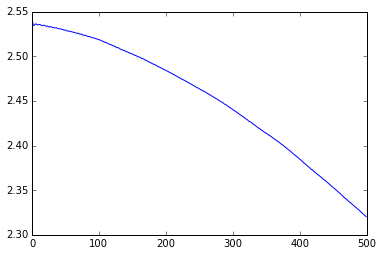

In [45]:
plt.plot(g2)

#   Make differnt ROI's

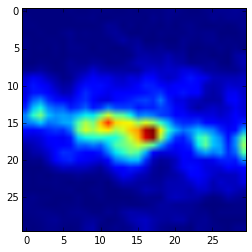

In [24]:
plt.figure()
plt.imshow(X_data[0])
plt.show()

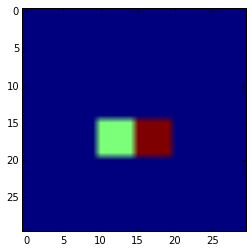

In [32]:
roi_data1 = np.array(([15, 10, 5, 5], (15, 15, 5, 5)), dtype=np.int64)
label_array1 = roi.rectangles(roi_data1, shape=X_data[0].shape)

plt.figure()
plt.imshow(label_array1)
plt.show()

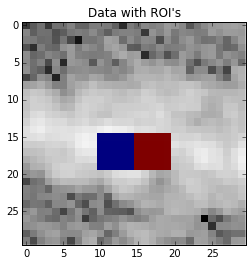

In [41]:
def test_demo(ax, label_array, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """
    vmin, vmax = np.percentile(image, [100, 100])
    im = ax.imshow(image, interpolation='none', norm=LogNorm(), cmap='gray')
    im = ax.imshow(label_array, interpolation='none', norm=LogNorm())
    

fig, ax = plt.subplots()
plt.title("Data with ROI's")
test_demo(ax, label_array1, X_data[0].shape ,  X_data[0])
plt.show()    
    

##  Calling one time correlation

In [33]:
num_levels = 1
num_bufs = 500

g2_1, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, label_array1,
                                             X_data)

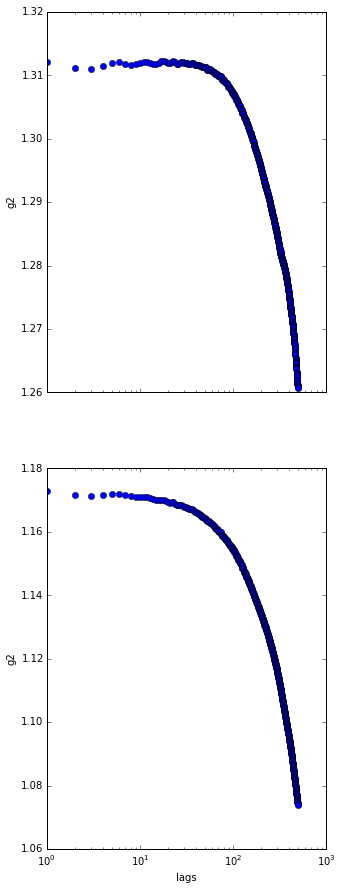

In [37]:
num_rois = np.max(label_array1)

fig, axes = plt.subplots(num_rois, sharex=True, figsize=(5,15))
axes[num_rois-1].set_xlabel("lags")
for i in range(num_rois):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lag_steps, g2_1[:, i], 'o', markersize=6)
plt.show()
